In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Q1

In [2]:
# read dataset rating and movie
rating = pd.read_csv('ratings.csv')
movie = pd.read_csv('movies.csv')

# merge them
df = pd.merge(movie,rating, how='outer')

# trasforming df row with userId, column with movieId and the value with rating
df = df.pivot(index='userId',columns='movieId',values='rating')

# fill 0 to missing values
df = df.fillna(0)

# first row is Nan user so drop it
df = df[1:]
df

movieId,1,2,3,4,5,6,7,8,9,10,...,161830,161918,161944,162376,162542,162672,163056,163949,164977,164979
userId,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q2

### (a)

In [3]:
X_scaled = preprocessing.scale(df.T, with_std=False)
X_scaled

array([[-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
         3.98706849,  4.95063014],
       [-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
        -0.01293151, -0.04936986],
       [-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
        -0.01293151, -0.04936986],
       ...,
       [-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
        -0.01293151, -0.04936986],
       [-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
        -0.01293151, -0.04936986],
       [-0.00558904, -0.0290411 , -0.01994521, ..., -0.01358904,
        -0.01293151, -0.04936986]])

### (b)

In [4]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_trans = pca.transform(X_scaled)
X_trans

array([[39.48434334,  6.5881539 ],
       [14.60193213,  2.8642401 ],
       [ 4.27237624, -1.53202462],
       ...,
       [-1.80176002, -0.45865992],
       [-2.37064638,  0.29626787],
       [-2.37064638,  0.29626787]])

### (c)

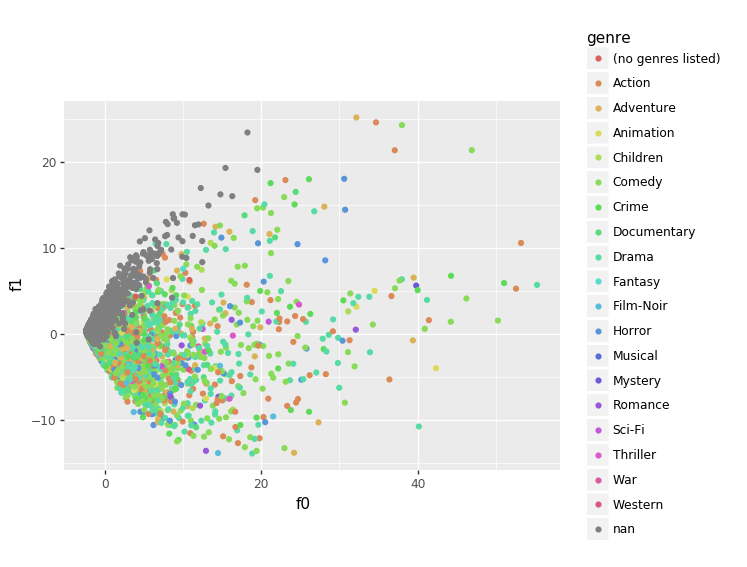

<ggplot: (7556698321)>


In [5]:

def first_gen(genres):
    if '|' in genres:
        return genres[0:genres.index('|')]
    else:
        return genres
df_2 = df.T.copy()
df_2['f0'] = X_trans.T[0]
df_2['f1'] = X_trans.T[1]
df_2['genre'] = movie['genres'].apply(lambda x: first_gen(x))
plot = (ggplot() + geom_point(df_2,aes(x='f0', y='f1',color='genre')))
print(plot)

only nan is clustered and its hard to see a pattern here

### d)

In [6]:
S = np.dot(X_scaled.T,X_scaled)
U, V_2 = np.linalg.eig(S)
Ur = np.real(U)
k = 1
denom = Ur.sum()
while(True):
    num = Ur[0:k].sum()
    ratio = num/denom
    if ratio > 0.8:
        break
    else:
        k += 1
print(k)        

177


177 of principle components that are needed to explain 80% of the variance of the data.

## Q3

### a)

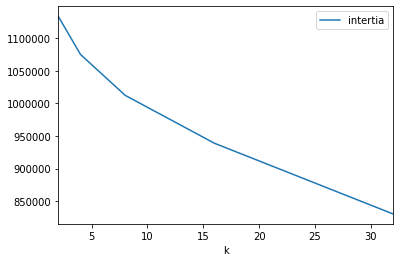

In [7]:

def get_iner(k,df):
    kmeans = KMeans(k)
    rslt = kmeans.fit(df)
    return kmeans.inertia_

df_inter = pd.DataFrame(columns = ['intertia' , 'k'])
for i in range(1,6):
    k = 2 ** i
    df_inter = df_inter.append({'intertia':get_iner(k,df),'k':k}, ignore_index=True)

df_inter.plot(x='k',y='intertia')

### b)

I would choose 4 for best k here because it has most sigificant decrease and less complexity.

### c)

In [8]:
kmeans = KMeans(4)
rslt = kmeans.fit(df)
df_cluster = df.copy()
df_cluster['cluster'] = rslt.predict(df)


In [9]:
df_cluster_top = df_cluster.groupby('cluster').agg(lambda x : x.mean())
for i in df_cluster_top.T.columns:
    temp = df_cluster_top.T[i].sort_values(ascending=False).to_frame().head(3)
    temp = temp.reset_index()
    temp = pd.merge(temp,movie)
    print("group"+str(i)+":")
    print(temp['title'].values)

group0:
['Pulp Fiction (1994)' 'Star Wars: Episode IV - A New Hope (1977)'
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)']
group1:
['Shawshank Redemption, The (1994)' 'Pulp Fiction (1994)'
 'Forrest Gump (1994)']
group2:
['Forrest Gump (1994)' 'Star Wars: Episode IV - A New Hope (1977)'
 'Matrix, The (1999)']
group3:
['Departed, The (2006)' 'Fargo (1996)' 'Brokeback Mountain (2005)']


## Q4

### a)

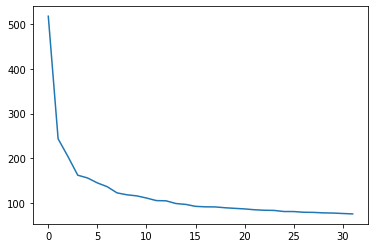

In [10]:
svd = decomposition.TruncatedSVD(n_components=32)
svd.fit(df)
plt.plot(svd.singular_values_)

###  b)

[0.15980049965388032, 0.21218470021174343, 0.2762515224376213, 0.3489610509946592, 0.43924293020603516]


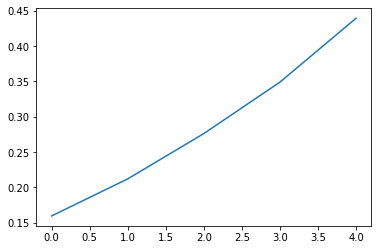

In [11]:
explained_variance_ratio = []
for i in range(1,6):
    k = 2 ** i
    svd = decomposition.TruncatedSVD(n_components=k)
    svd.fit(df)
    explained_variance_ratio.append(svd.explained_variance_ratio_.sum())
    
print(explained_variance_ratio)
plt.plot(explained_variance_ratio)

I would choose k as 4 because the variance is smallest to its previous (biggest spectral gap)

### c)

In [12]:
svd = decomposition.TruncatedSVD(n_components=2)
svd.fit(df)
X_svd = svd.transform(df)
X_svd


array([[ 1.07914743,  0.95203843],
       [ 9.47543717,  1.58804673],
       [ 7.81092001, -3.23305859],
       ...,
       [ 3.62297938,  0.38580701],
       [ 6.58375512, -0.27455813],
       [20.84111055, -4.66999586]])

### d)

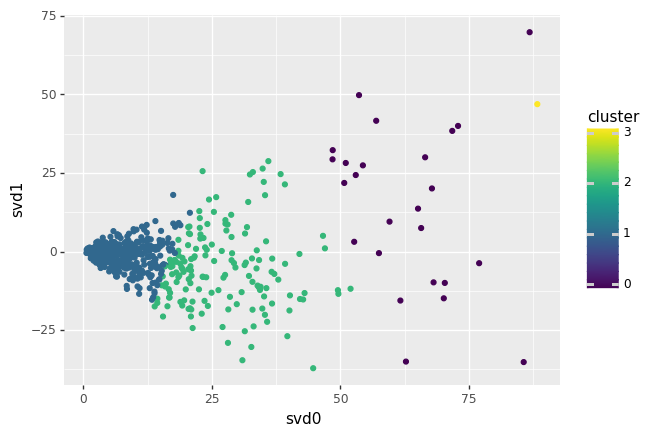

<ggplot: (7556684709)>


In [13]:
df_cluster["svd0"] = X_svd.T[0]
df_cluster["svd1"] = X_svd.T[1]
plot = (ggplot() + geom_point(df_cluster[['svd0','svd1','cluster']],aes(x='svd0', y='svd1',color='cluster')))
print(plot)

This is much clear to view than PCA above.